## Gives a user with at least one published paper similar users

The pro of this method is a new user can either use the similary between their abstract to find similar papers and user or type in a known similar user to find more researchers with similar interests.

In [2]:
#import relevant packages
import numpy as np
import pandas as pd
import similarity as sm
import matplotlib.pyplot as plt
import imp
import re
from sklearn.feature_extraction.text import TfidfVectorizer
imp.reload(sm)

<module 'similarity' from '/home/013786240/.local/lib/python3.7/site-packages/similarity/__init__.py'>

In [3]:
article_data = pd.read_pickle('abstract.pkl')

### TF-IDF

#### TfidfVectorizer used for finding similar Authors

In [4]:
# vectorization that gets papers just like the writer's
vectorizer = TfidfVectorizer(stop_words = 'english', strip_accents='ascii', max_df = .9, min_df = .001)
# vectorization that gets slightly less specialized results
#vectorizer = TfidfVectorizer(strip_accents='ascii', max_df = .9, min_df = .003)
corpus = list(article_data.abstract)
text_vectorized = vectorizer.fit_transform(corpus)
text_vectorized.shape

(1789904, 6384)

In [1]:
#total_words = text_vectorized.sum(axis=0) 
#freq = [(word, total_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
#freq =sorted(freq, key = lambda x: x[1], reverse=True)
#freq_words = pd.DataFrame(freq)
#freq_words.rename(columns = {0:'Word', 1: 'count'}, inplace = True) 
#freq_words.head(10)

### Cosine Similarity and Similar Papers

In [5]:
def cos_sim(paper_id, text_vectorized):
    
    N = len(article_data)
    M = len(paper_id)
    similarity_array = np.empty((N,M))

    for i in range(M):
        
        index = list(article_data[article_data.id == paper_id[i]].index)[0]
    
        similarity = np.dot(text_vectorized, text_vectorized[index].T)
        similarity = similarity.todense()
        similarity += 1
        similarity_array[:, i] = np.squeeze(similarity)
    
    similarity_score = M / np.sum(1/similarity_array, axis = 1)
    similarity_score += -1
    
    return similarity_score

In [6]:
def abstract_similarity(paper_id, text_vectorized):
    
    df = pd.DataFrame()
    #stores all papers ids
    df['id'] = article_data['id']
    #gets the similarity score between given ids and all the papers. This saves data space because
    #cosine similarity isn't calculated bewteen all the papers at once. 
    df['similarity_score'] = cos_sim(paper_id, text_vectorized)
    df['authors'] = article_data['authors']
    df['categories'] = article_data['categories']
    df.sort_values(by = 'similarity_score', ascending = False, inplace = True)
    
    return df

In [ ]:
#Ineffective for large datasets
#Don't run
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(text_vectorized, text_vectorized)
cos_sim.shape

In [7]:
new_df = abstract_similarity(['1002.3005'], text_vectorized)
new_df.head(5)

,id,similarity_score,authors,categories
173764,1002.3005,1.000000,Seiji Kosugi,quant-ph
192868,1005.5328,0.625320,Seiji Kosugi,quant-ph
621355,1505.01083,0.538554,Masanao Ozawa,quant-ph
1026000,1809.05984,0.536009,"G. S. Thekkadath, F. Hufnagel, J. S. Lundeen",quant-ph
615684,1504.03779,0.511015,Seiji Kosugi,quant-ph


## Verify that the papers are on similar topics

Here I skimmed through the titles and abstracts from the papers calculated to be similar to the input article.  

In [8]:
for ID in new_df.head(5).id[0:]:
    print('ID: ', ID)
    print('Authors: ', list(article_data[article_data.id == ID].authors)[0])
    print('Title: ', list(article_data[article_data.id == ID].title)[0])
    print()
    print('Abstract: ')
    print(list(article_data[article_data.id == ID].abstract)[0])
    print()
    print('--------------------')
    print()

ID:  1002.3005
Authors:  Seiji Kosugi
Title:  Position Uncertainty in the Heisenberg Uncertainty Relation

Abstract: 
  Position measurements are examined under the assumption that object position
x_t and probe position X_t just after the measurement are expressed by a linear
combination of positions x_0 and X_0 just before the measurement. The
Heisenberg uncertainty relation between the position uncertainty and momentum
disturbance holds when the measurement error \epsilon(x_t) for the object
position x_t is adopted as the position uncertainty. However, the uncertainty
in the measurement result obtained for x_0 is the standard deviation of the
measurement result, and not the measurement error \epsilon(x_0). This
difference is due to the reduction of a wave packet. The validity of the
linearity assumption is examined in detail.


--------------------

ID:  1005.5328
Authors:  Seiji Kosugi
Title:  Proof of the Standard Quantum Limit for Monitoring Free-Mass Position

Abstract: 
  The me

## Use Similarity between Abstracts to recommend similar Authors!

In [37]:
author_data = pd.read_pickle('authors.pkl')

In [53]:
# verifying if results have a known author
for ID in author_data.loc[374818, 'Articles']:
    print('ID: ', ID)
    print('Authors: ', list(article_data[article_data.id == ID].authors)[0])
    #print('Authors: ', list(article_data[article_data.id == ID].authors_parsed)[0])
    print('Title: ', list(article_data[article_data.id == ID].title)[0])
    print()
    print('--------------------')
    print()

ID:  1306.5326
Authors:  Giacomo Micheli
Title:  Cryptanalysis of a non-commutative key exchange protocol

--------------------

ID:  1309.6591
Authors:  Giacomo Micheli, Davide Schipani
Title:  On Canonical Subfield Preserving Polynomials

--------------------

ID:  1311.1442
Authors:  Giacomo Micheli, Michele Schiavina
Title:  A general construction for monoid-based knapsack protocols

--------------------

ID:  1409.3020
Authors:  Giacomo Micheli, Joachim Rosenthal, Paolo Vettori
Title:  Linear spanning sets for matrix spaces

--------------------

ID:  1409.6527
Authors:  Andrea Ferraguti, Giacomo Micheli
Title:  On Mertens-Ces\`aro Theorem for Number Fields

--------------------

ID:  1411.6876
Authors:  Giacomo Micheli and Reto Schnyder
Title:  On the Density of Coprime m-tuples over Holomorphy Rings

--------------------

ID:  1506.05380
Authors:  Edoardo Dotti, Giacomo Micheli
Title:  Eisenstein Polynomials over Function Fields

--------------------

ID:  1507.02753
Authors:  G

In [39]:
def abstract_similarity(paper_id, text_vectorized):
    
    df = pd.DataFrame()
    df['id'] = article_data['id']
    df['similarity_score'] = cos_sim(paper_id, text_vectorized)
    df.sort_values(by = 'similarity_score', ascending = False, inplace = True)
    
    return df.iloc[0:11]

def name2user(last_name, first_name):
    name = re.sub('[^a-z]', '', (last_name + first_name).lower())
    idx = author_data.index[author_data['Authors'] == name].tolist()
    return idx[0]

In [40]:
def similar_authors(last_name, first_name, num_authors, text_vectorized):
    #user = 5857
    
    user = name2user(last_name, first_name)
    top_papers = []
    num_art = author_data.loc[user, 'Num_Articles']
    
    # creat a dataframe with the paperts similar to the user's
    #currentlys gives back the 10 most similar papers/users back to here.
    for i in range(num_art):
        ID = author_data.loc[user, 'Articles'][i]
        abs_df = abstract_similarity([ID], text_vectorized)
        top_papers.extend(abs_df.values.tolist())
    
    #organize the similar papers by the similarity score. This sends the ones written by this author to the top
    #should drop the papers written by them here...
    #the limitation to this method is that it's harder to remove authors that the given user knows
    organize_papers = pd.DataFrame(top_papers,columns=['id' ,'similarity_score'])
    organize_papers.sort_values(by = 'similarity_score', ascending = False, inplace = True)
    
    
    # save this to check that the other articles aren't one the user has written
    users_articles = author_data.loc[user, 'Articles']
    NUM_OF_AUTHORS = num_authors
    
    # Remove papers that the author co wrote and remove papers that are repeated.
    for i in range(num_art):
        organize_papers = organize_papers[organize_papers.id != users_articles[i]]
    organize_papers = organize_papers.drop_duplicates(subset=['id'])
    
    #Initialize Similar authors frame
    sim_authors = pd.DataFrame(columns=['last_name', 'first_name' ,'id', 'similarity_score'])
    
    #Only takes the first author of a paper (for now)
    for ID in organize_papers.head(NUM_OF_AUTHORS).id[0:]:
        authors_per_paper = list(article_data[article_data.id == ID].authors_parsed)[0][0]
        sim_authors = sim_authors.append(
            {
                'last_name': authors_per_paper[0],
                'first_name': authors_per_paper[1],
                'id':  ID,
                'similarity_score': organize_papers[organize_papers.id == ID].similarity_score.values
            },
            ignore_index=True
        )
        
    # Here there is a chance for 2 things. 1) Co authors who wrote similar papers to appear
    # 2) Repeated authors to appear because they wrote multiple similar papers.
    return sim_authors.iloc[0:NUM_OF_AUTHORS, 0:2]
#sim_authors.head(NUM_OF_AUTHORS)

In [41]:
similar_authors('Micheli', 'Giacomo', 10, text_vectorized)

,last_name,first_name
0,Agustín-Aquino,Octavio Alberto
1,Wang,Yan-Ling
2,Casanovas,Enrique
3,Kurilic,Milos
4,Stasinski,Alexander
5,Zhang,John
6,Wickelgren,Kirsten
7,Szpojankowski,Kamil
8,Chen,Yin
9,Wong,Yat-Sen


### Test Code and Some things to Consider

In [23]:
# when the same paper appears multiple times...it's similar to multiple papers
#if sim is 
sim_authors.head(NUM_OF_AUTHORS)

,last_name,first_name,id,similarity_score
0,Kim,Minhyong,"[0710.5254, 0710.5254]","[0.8155148519556765, 0.7170654679503028]"
1,Britton,Mathew,"[2007.08619, 2007.08619]","[0.7873089258823549, 0.6883274582240728]"
2,Malarz,Krzysztof,"[2006.15621, 2006.15621]","[0.7761352771079277, 0.6816572084408405]"
3,Feng,Steven Y.,[1909.00088],[0.7704604155997052]
4,Chakraborty,Nilesh,[1705.10771],[0.7690612576003131]
5,Chernikov,Artem,"[1505.00454, 1505.00454]","[0.7644150876292732, 0.6715758648962975]"
6,Sun,Xu,"[1706.06197, 1706.06197]","[1.0, 0.7592612936483181]"
7,Sun,Xu,"[1711.06528, 1711.06528]","[1.0000000000000004, 0.7592612936483181]"
8,Baranau,Vasili,[1809.02219],[0.7585633686641664]
9,Wang,Qitong,[1911.07046],[0.7541923278489207]


In [87]:
# no problems when there is only a few papers. The authors are unique and the papers aren't present multiple times.
sim_authors.head(NUM_OF_AUTHORS)

,last_name,first_name,id,similarity_score
0,Haroske,Dorothee D.,1905.09703,0.512863
1,Zang,Wenston J. T.,1811.10013,0.511020
2,Gallaun,Dennis,1905.10285,0.501246
3,Hoyrup,Mathieu,1712.03680,0.498101
4,Mal,Arpita,2007.12628,0.483316
5,Zhang,Xiaoxiang,1307.5528,0.480675
6,Aistleitner,Christoph,1306.3315,0.478942
7,Shi,Jian,1306.2397,0.475034
8,Furmanczyk,H.,1602.01867,0.474434
9,Belyaev,A. A.,1801.01830,0.474148


In [58]:
#Structure pick max of 3 authors from each paper. Often the most important are the first and last person
#First is the grad student who wrote it and the last is the professor
#Make a dataframe with the sim score of each author. We have to note the writers on the papers they wrote
#And remove them. Also Submitter is often the first author (though there are cases which this isn't true)
#num_articles = there number of papers to remove from the top, but this has the authors we need to remove.
for ID in organize_papers.head(NUM_OF_AUTHORS).id[0:]:
    print('Authors: ', list(article_data[article_data.id == ID].authors_parsed)[0])

Authors:  [['Bombach', 'Clemens', '']]
Authors:  [['Bombach', 'Clemens', ''], ['Gallaun', 'Dennis', ''], ['Seifert', 'Christian', ''], ['Tautenhahn', 'Martin', '']]
Authors:  [['Haroske', 'Dorothee D.', ''], ['Moura', 'Susana D.', ''], ['Skrzypczak', 'Leszek', '']]
Authors:  [['Zang', 'Wenston J. T.', ''], ['Zhang', 'Helen W. J.', '']]
Authors:  [['Gallaun', 'Dennis', ''], ['Seifert', 'Christian', ''], ['Tautenhahn', 'Martin', '']]
Authors:  [['Hoyrup', 'Mathieu', '']]
Authors:  [['Mal', 'Arpita', ''], ['Sey', 'Subhrajit', ''], ['Paul', 'Kallol', '']]
Authors:  [['Zhang', 'Xiaoxiang', ''], ['Zhang', 'Shuangshuang', ''], ['Chen', 'Jianlong', ''], ['Wang', 'Long', '']]
Authors:  [['Aistleitner', 'Christoph', '']]
Authors:  [['Shi', 'Jian', ''], ['Gao', 'Zongsheng', '']]


### Check the CS parts

The following code is just a check that our text vectorization does group papers together properly. Here I verified by transforming the features into 2D data then plotting papers that have similar tags together. In the plots below confidence is determined by pearson correlation coefficient. Most papers with the same tag have close confidence after vectorization.

In [5]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)

text_2d = svd.fit_transform(text_vectorized)
text_2d.shape

(1789904, 2)

In [6]:
categories_sep = [categories.split() for categories in article_data.categories]
categories_num = [len(categories) for categories in categories_sep]
article_data['x'] = text_2d[:,0]
article_data['y'] = text_2d[:,1]
article_data['categories'] = categories_sep
article_data['categories_num'] = categories_num
categories_set = list(set([category for categories in article_data.categories for category in categories]))
print(len(categories_set))

176


In [7]:
#cs_plot = ['cs.AI cs.AR cs.CC cs.CE cs.CG cs.CL cs.CR cs.CV cs.CY cs.DB cs.DC cs.DL cs.DM cs.DS cs.ET cs.FL cs.GL cs.GR cs.GT cs.HC cs.IR cs.IT cs.LG cs.LO cs.MA cs.MM cs.MS cs.NA cs.NE cs.NI cs.OH cs.OS cs.PF cs.PL cs.RO cs.SC cs.SD cs.SE cs.SI cs.SY']
cs_plot = ['cs.AI cs.AR cs.DL cs.DS']

In [8]:
to_plot = cs_plot[0].split()

In [9]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std, **kwargs):
    
    cov = np.cov(x,y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    
    rad_x = np.sqrt(1 + pearson)
    rad_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0,0), width = 2*rad_x, height = 2*rad_y, facecolor = 'none', **kwargs)
    
    scale_x = np.std(x)*n_std
    x_bar = np.mean(x)
    
    scale_y = np.std(y)*n_std
    y_bar = np.mean(y)
    
    transform = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(x_bar, y_bar)
    
    ellipse.set_transform(transform + ax.transData)
    
    return ax.add_patch(ellipse)

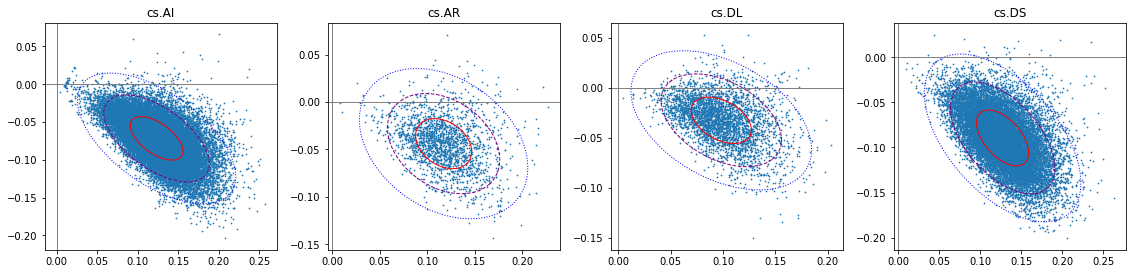

In [20]:
fig, axs = plt.subplots(1, 4, figsize = (16, 4))
fig.tight_layout(pad = 2)
#fig.patch.set_facecolor('xkcd:coral')

for ax, category in zip(np.ndarray.flatten(axs), to_plot):
    of_interest = [category in categories for categories in article_data.categories]
    x = article_data[of_interest].x
    y = article_data[of_interest].y
    
    ax.scatter(x, y, s = 0.5)
    ax.axvline(c = 'grey', lw = 1)
    ax.axhline(c = 'grey', lw = 1)
    confidence_ellipse(x, y, ax, 1, edgecolor = 'red')
    confidence_ellipse(x, y, ax, 2, edgecolor = 'purple', linestyle = '--')
    confidence_ellipse(x, y, ax, 3, edgecolor = 'blue', linestyle = ':')
    
    ax.set_title(category)